In [2]:
### config에는 매핑자료와 폰트설치 담겨있음.
import config 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# config의 한글폰트설정 함수
config.set_korean_font()

한글 폰트 설정이 완료되었습니다.


In [3]:
# 파일 불러오기
file_name = pd.read_csv("tbsh_gyeonggi_day_202507_이천시.csv", encoding='utf-8')
df = file_name

# config에서 매핑자료로 매핑
df['age'] = df['age'].map(config.AGE_MAP)
df['hour'] = df['hour'].map(config.TIME_SHORT_MAP)
df['day'] = df['day'].map(config.DAY_MAP)

# 카테고리화
df['sex'] = df['sex'].astype('category')
df['card_tpbuz_cd'] = df['card_tpbuz_cd'].astype('category')
df['card_tpbuz_nm_1'] = df['card_tpbuz_nm_1'].astype('category')
df['card_tpbuz_nm_2'] = df['card_tpbuz_nm_2'].astype('category')

# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ta_ymd           536716 non-null  int64   
 1   cty_rgn_no       536716 non-null  int64   
 2   admi_cty_no      536716 non-null  int64   
 3   card_tpbuz_cd    536716 non-null  category
 4   card_tpbuz_nm_1  536716 non-null  category
 5   card_tpbuz_nm_2  536716 non-null  category
 6   hour             536716 non-null  object  
 7   sex              536716 non-null  category
 8   age              536716 non-null  object  
 9   day              536716 non-null  object  
 10  amt              536716 non-null  int64   
 11  cnt              536716 non-null  int64   
dtypes: category(4), int64(5), object(3)
memory usage: 34.8+ MB


C:\Users\owner\AppData\Local\Temp\ipykernel_15704\1035401524.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_60 = age_60.groupby(['card_tpbuz_nm_1'])['amt'].sum().sort_values(ascending=False)
c:\Users\owner\Desktop\Git\02_GitHub\02.Cohort-Practice\my_plotting.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette=colors, ax=ax, order=data.index)


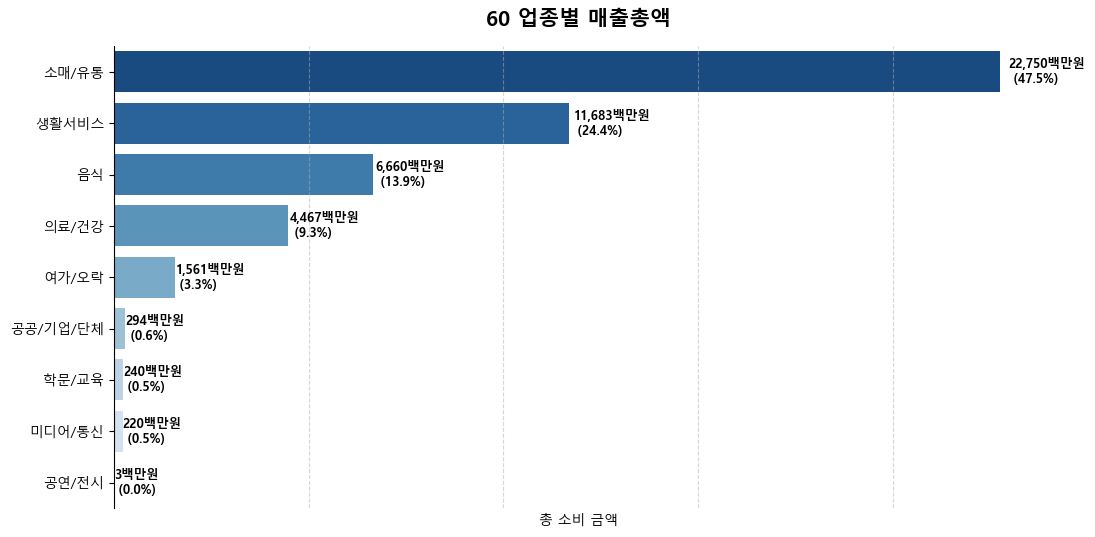

In [12]:
# MISSION 2: 세대별 소비 트렌드 비교 (Cohort Analysis 연습)
## 청년층(2030) / 중년층(4050) / 노년층 60세 이상그룹 분리 -> 세그멘테이션 생성
import importlib
import my_plotting as mp # my_plotting -> barh 플롯 모듈화

# my_plotting 수정사항 동기화
importlib.reload(mp)

#나이 선정
age_60 = df[df['age'].isin(['60대','70대','80대','90대','100세 이상'])]

# 고정 나이 + 업종 별 매출총액 Series 
data_60 = age_60.groupby(['card_tpbuz_nm_1'])['amt'].sum().sort_values(ascending=False)

# 그래프 크기와 [4]행 [2]열 만큼 공간 확보
fig, axes = plt.subplots(figsize=(12,6))

# 나이 별 barh plot 제작.
mp.draw_top_categories(data_60, '60 업종별 매출총액', axes)
